Optimized parameters: a=-1.499, b=-0.846
MAE: 0.155


C:\Users\emanu\AppData\Local\Temp\ipykernel_35652\4279773262.py:8: RuntimeWarning: divide by zero encountered in divide
  return a / x + b


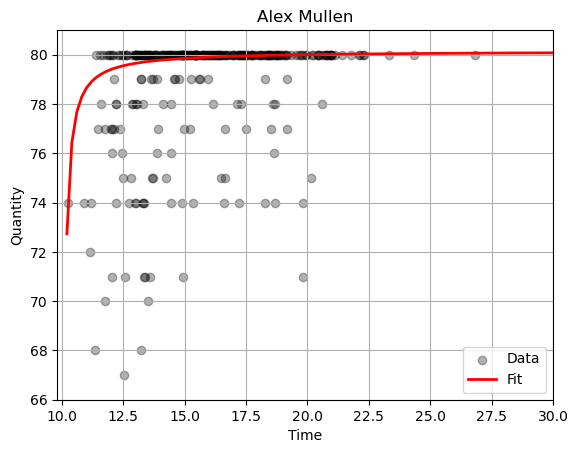

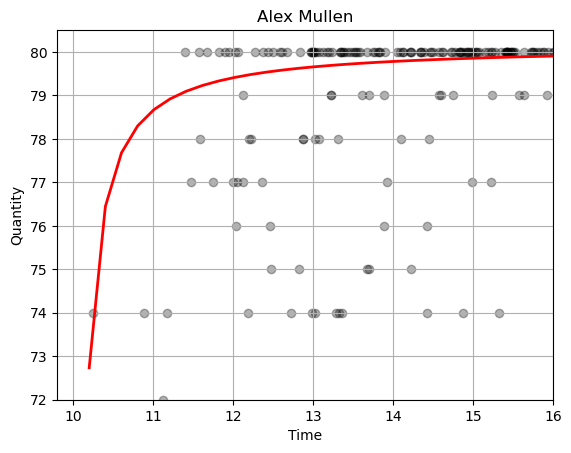

[10.5, 11, 12, 12.5, 14, 17, 20, 23, 25]
[77, 79, 79, 80, 80, 80, 80, 80, 80]
Optimized parameters: a=-0.867, b=-0.997
MAE: 0.217


C:\Users\emanu\AppData\Local\Temp\ipykernel_35652\4279773262.py:8: RuntimeWarning: divide by zero encountered in divide
  return a / x + b


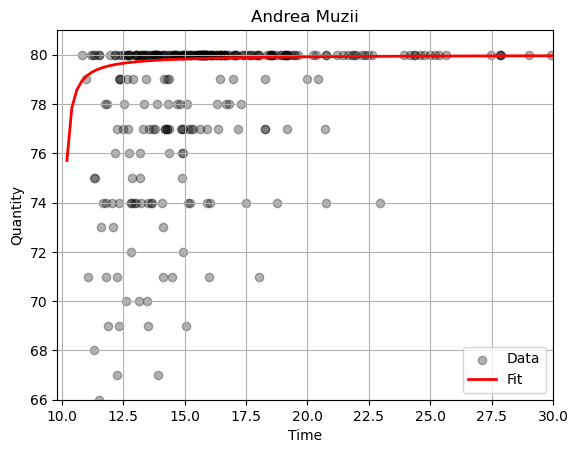

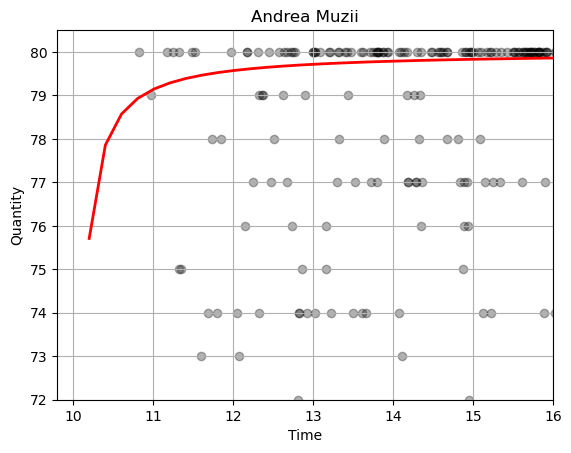

[10.5, 11, 12, 12.5, 14, 17, 20, 23, 25]
[78, 79, 80, 80, 80, 80, 80, 80, 80]


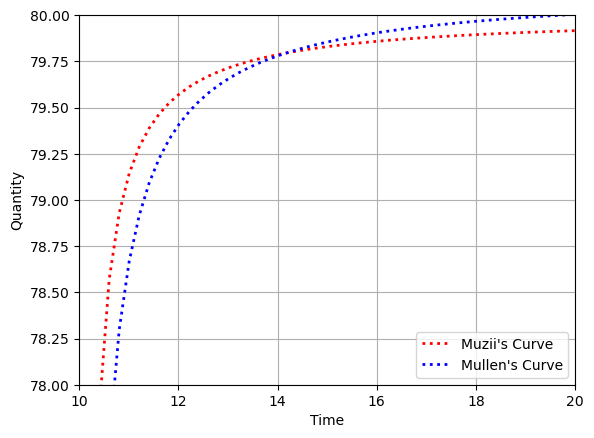

Time		Muzii		Mullen
10.5		78		77
11		79		79
12		80		79
12.5		80		80
14		80		80
17		80		80
20		80		80
23		80		80
25		80		80


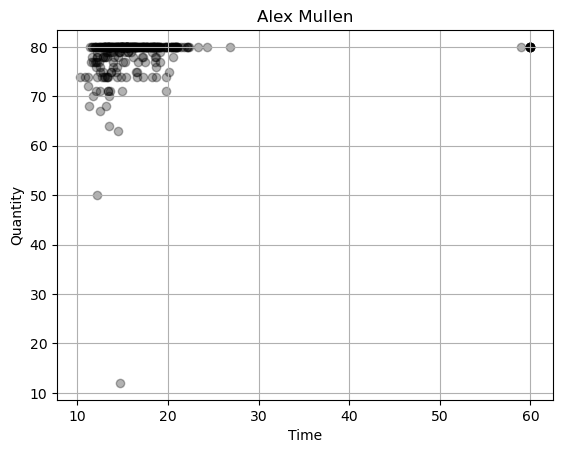

               80       15.16
count  320.000000  320.000000
mean    78.396875   17.292750
std      4.899810    8.517408
min     12.000000   10.250000
25%     79.000000   13.537500
50%     80.000000   15.430000
75%     80.000000   18.137500
max     80.000000   60.000000


C:\Users\emanu\AppData\Local\Temp\ipykernel_35652\4279773262.py:318: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


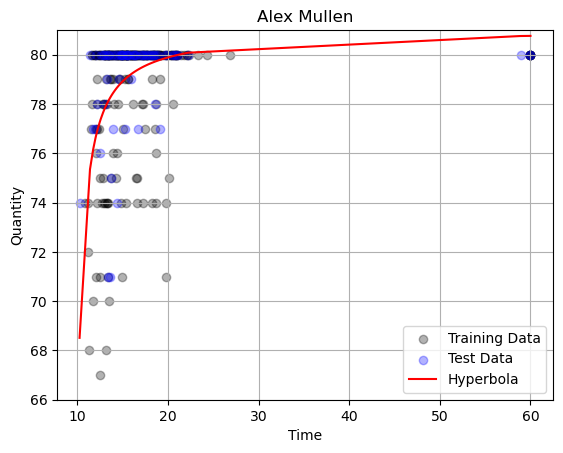

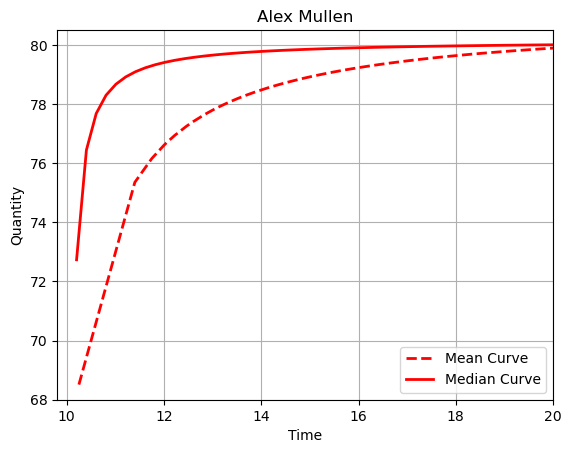


HYPERBOLIC
R-Squared: 0.004564797951752575
Mean Squared Error: 4.291842204143567
Mean Absolute Error: 1.3478917715830825
Median Absolute Error: 0.8943095454164194
RMSE: 2.071676182260048

RATIONAL
R-Squared: -0.06425248238759051
Mean Squared Error: 4.588549521231652
Mean Absolute Error: 1.4176530443521105
Median Absolute Error: 0.8861075980977234
RMSE: 2.1420899890601355

LOGARITHMIC
R-Squared: 0.09796520907700779
Mean Squared Error: 3.889144142504893
Mean Absolute Error: 1.4839027009386054
Median Absolute Error: 1.2685738485340878
RMSE: 1.9720913119084758


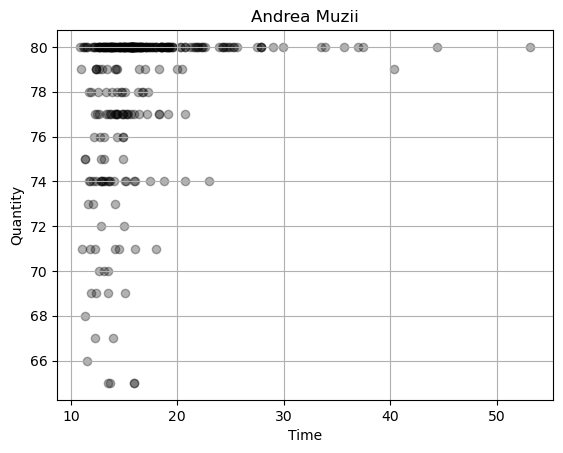

               80       47.26
count  304.000000  304.000000
mean    78.088816   16.526151
std      3.336270    5.245910
min     65.000000   10.820000
25%     77.000000   13.497500
50%     80.000000   15.240000
75%     80.000000   17.512500
max     80.000000   53.190000


C:\Users\emanu\AppData\Local\Temp\ipykernel_35652\4279773262.py:318: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


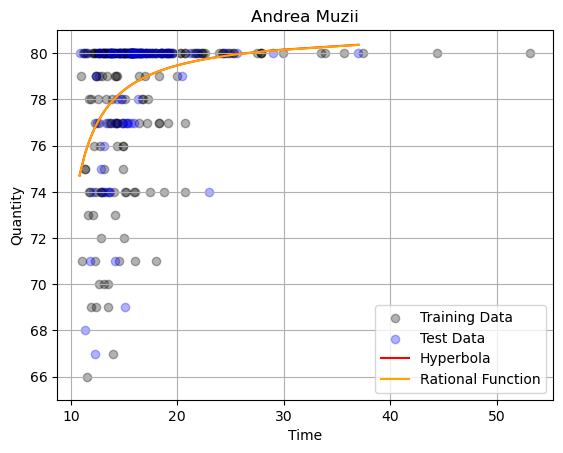

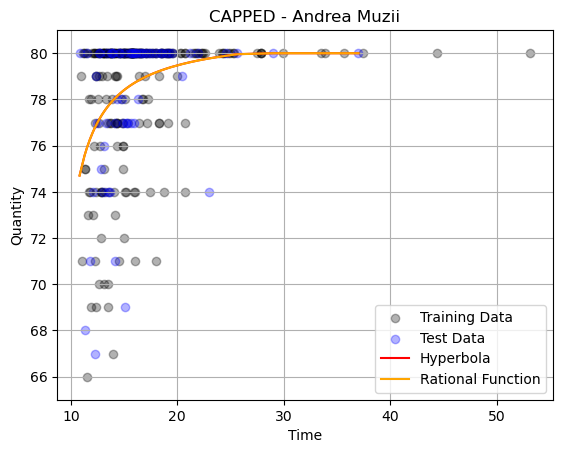

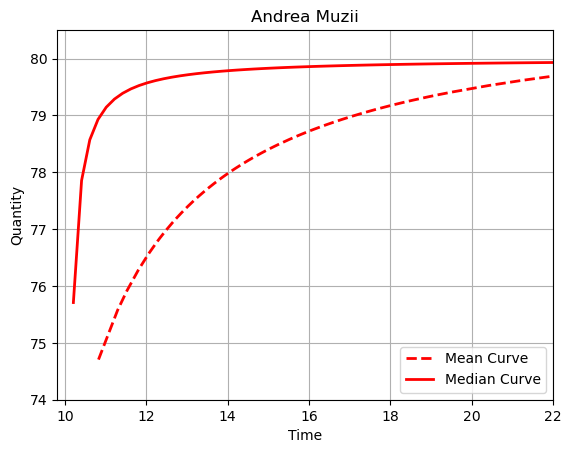

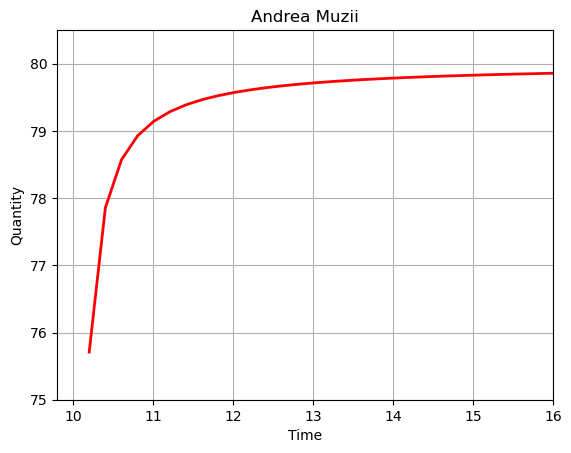


HYPERBOLIC
R-Squared: 0.16981062606430286
Mean Squared Error: 8.891097586691892
Mean Absolute Error: 2.0575049310027005
Median Absolute Error: 1.3678780920570885
RMSE: 2.98179435687505

RATIONAL
R-Squared: 0.16970689107717973
Mean Squared Error: 8.892208559588706
Mean Absolute Error: 2.058021926643912
Median Absolute Error: 1.3681281230876006
RMSE: 2.9819806437313954

LOGARITHMIC
R-Squared: 0.12660897834983864
Mean Squared Error: 9.353775233256105
Mean Absolute Error: 2.1324576324664344
Median Absolute Error: 1.5751031101104775
RMSE: 3.0583942246309754


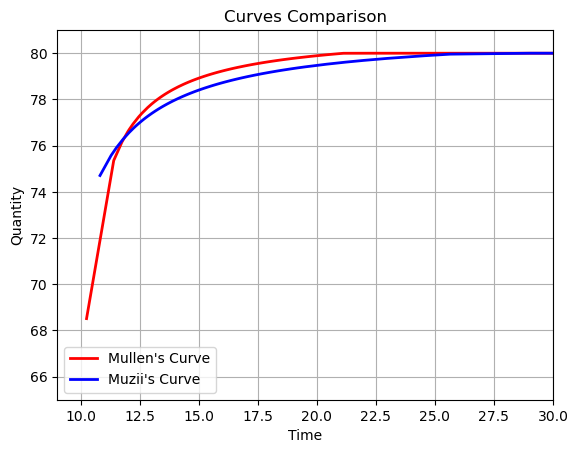

Time         Muzii's     Mullen's
10.5         74          71
11.0         75          74
12.0         77          77
12.5         77          77
14.0         78          78
17.0         79          79
20.0         79          80
23.0         80          80
25.0         80          80


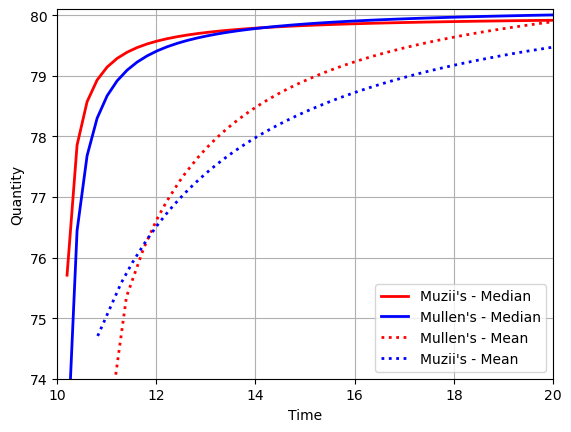

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pandas as pd

# Define the hyperbolic function
def hyperbolic(x, a, b):
    return a / x + b

# Define the MAE loss function
def mae_loss(params, x, y):
    a, b = params
    return np.median(np.abs(y - hyperbolic(x, a, b)))

shift_y = 81
shift_x = 10




##### Get the data

# subfolder = 'Project/'    # Terminal
subfolder = '../'          # Jupyter
data = pd.read_csv(f'{subfolder}Dataset/Alex Mullen - Numbers.txt')

mask = data.iloc[:, 0] < np.percentile(data.iloc[:, 0], 100-99)
data = data.drop(data[mask].index)

data = data.sort_values(by='15.16', ignore_index=True)
x_data = np.array(data.iloc[:, 1] - shift_x)
y_data = np.array(data.iloc[:, 0] - shift_y)
# x_data = np.array([1, 2, 3, 4, 5])
# y_data = np.array([0.5, 0.3, 0.2, 0.1, 0.05])







# Set initial values for the parameters
params0 = np.array([1, 1])

# Fit the hyperbolic model to the data using the MAE loss function
result = least_squares(lambda params, x, y: y - hyperbolic(x, *params),
                       params0, loss='cauchy', args=(x_data, y_data))

# Extract the optimized parameters and the MAE
a_opt, b_opt = result.x
mae = mae_loss(result.x, x_data, y_data)

print(f'Optimized parameters: a={a_opt:.3f}, b={b_opt:.3f}')
print(f'MAE: {mae:.3f}')


# Create a new array of x values
x_fit = np.linspace(0, 20, 100)

# Calculate the corresponding y values using the optimized parameters
y_fit = hyperbolic(x_fit, a_opt, b_opt)
mullen_y = hyperbolic(x_fit, a_opt, b_opt) # to use it later


# Plot the original data and the fitted curve
plt.scatter(x_data+shift_x, y_data+shift_y, label='Data', alpha=0.3, color='black')
plt.plot(x_fit+shift_x, y_fit+shift_y, label='Fit', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.xlim(9.8, 30)#10,20)
plt.ylim(66, 81)#78,80)
plt.title("Alex Mullen")
plt.grid(visible=True)
plt.legend()
plt.show()

plt.scatter(x_data+shift_x, y_data+shift_y, label='Data', alpha=0.3, color='black')
plt.plot(x_fit+shift_x, y_fit+shift_y, label='Fit', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.xlim(9.8, 16)#10,20)
plt.ylim(72, 80.5)#78,80)
plt.title("Alex Mullen")
# plt.legend()
plt.grid(visible=True)
plt.show()

# print(hyperbolic(np.array([10.5, 12.5, 14, 17, 20, 23, 25]), a_opt, b_opt))
test_x = [10.5, 11, 12, 12.5, 14, 17, 20, 23, 25]
test_h = hyperbolic(np.array(test_x)-shift_x, a_opt, b_opt)
mullen = []
for el in test_h:
    mullen.append(int(np.round(el+shift_y)))
print(test_x)
print(mullen)































data = pd.read_csv(f'{subfolder}Dataset/Andrea Muzii - Numbers.txt')

mask1 = data.iloc[:, 0] != 80
mask2 = data.iloc[:, 1] > np.percentile(data.iloc[:, 1], 95)
data = data.drop(data[np.logical_and(mask1, mask2)].index)

mask = data.iloc[:, 0] < np.percentile(data.iloc[:, 0], 100-99)
data = data.drop(data[mask].index)

mask = data.iloc[:, 0] < 65
data = data.drop(data[mask].index)

data = data.sort_values(by='47.26', ignore_index=True)
x_data = np.array(data.iloc[:, 1] - shift_x)
y_data = np.array(data.iloc[:, 0] - shift_y)
# x_data = np.array([1, 2, 3, 4, 5])
# y_data = np.array([0.5, 0.3, 0.2, 0.1, 0.05])







# Set initial values for the parameters
params0 = np.array([1, 1])

# Fit the hyperbolic model to the data using the MAE loss function
result = least_squares(lambda params, x, y: y - hyperbolic(x, *params),
                       params0, loss='cauchy', args=(x_data, y_data))

# Extract the optimized parameters and the MAE
a_opt, b_opt = result.x
mae = mae_loss(result.x, x_data, y_data)

print(f'Optimized parameters: a={a_opt:.3f}, b={b_opt:.3f}')
print(f'MAE: {mae:.3f}')


# Create a new array of x values
x_fit = np.linspace(0, 20, 100)

# Calculate the corresponding y values using the optimized parameters
y_fit = hyperbolic(x_fit, a_opt, b_opt)
muzii_y = hyperbolic(x_fit, a_opt, b_opt) # to use it later

# Plot the original data and the fitted curve
plt.scatter(x_data+shift_x, y_data+shift_y, label='Data', alpha=0.3, color='black')
plt.plot(x_fit+shift_x, y_fit+shift_y, label='Fit', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.xlim(9.8,30)
plt.ylim(66,81)
plt.title("Andrea Muzii")
plt.grid(visible=True)
plt.legend()
plt.show()

plt.scatter(x_data+shift_x, y_data+shift_y, label='Data', alpha=0.3, color='black')
plt.plot(x_fit+shift_x, y_fit+shift_y, label='Fit', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.xlim(9.8, 16)#10,20)
plt.ylim(72, 80.5)#78,80)
plt.title("Andrea Muzii")
# plt.legend()
plt.grid(visible=True)
plt.show()

# print(hyperbolic(np.array([10.5, 12.5, 14, 17, 20, 23, 25]), a_opt, b_opt))
test_h = hyperbolic(np.array(test_x)-shift_x, a_opt, b_opt)
muzii = []
for el in test_h:
    muzii.append(int(np.round(el+shift_y)))
print(test_x)
print(muzii)





























# plt.scatter(x_data+shift_x, y_data+shift_y, label='Data', alpha=0.3)
plt.plot(x_fit+shift_x, muzii_y+shift_y, ':', label="Muzii's Curve", color='red', linewidth=2)
plt.plot(x_fit+shift_x, mullen_y+shift_y, ':', label="Mullen's Curve", color='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.xlim(10,20)
plt.ylim(78,80)
plt.grid(visible=True)
plt.legend()
plt.show()

# plt.plot(x_fit+shift_x, y_fit+shift_y, label="Muzii's Curve", color='red', linewidth=2)
# plt.plot(x_fit+shift_x, y_mullen+shift_y, label="Mullen's Curve", color='blue', linewidth=2)
# plt.xlabel('Time')
# plt.ylabel('Quantity')
# plt.xlim(10,20)
# plt.ylim(75,80)
# plt.legend()
# plt.show()

print("Time\t\tMuzii\t\tMullen")
for i in range(len(muzii)):
    print(f'{test_x[i]}\t\t{muzii[i]}\t\t{mullen[i]}')



































import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
# from myownsplit import myownsplit_function



step_flag = False
# # subfolder = 'Project/'    # Terminal
# subfolder = '../'          # Jupyter
shift = 81





# Define the hyperbolic function
def hyperbolic(x, a, b):
    return a / (x + b)
# Define the rational function
def rational(x, a, b, c):
    return a / (x - b) + c
# Define the logarithmic function
def logarithmic(x, a, b, c):
    return a * np.log(b * x) + c







# Data
data = pd.read_csv(f'{subfolder}Dataset/Alex Mullen - Numbers.txt')
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], label='Data', alpha=0.3, color='black')
# plt.legend()
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Alex Mullen')
plt.grid(visible=True)
plt.show()

print(data.describe())


# mask = data.iloc[:, 0] == 80
# data = data.drop(data[mask].index)
# mask1 = data.iloc[:, 0] != 80
# mask2 = data.iloc[:, 1] > np.percentile(data.iloc[:, 1], 95)
# data = data.drop(data[np.logical_and(mask1, mask2)].index)

mask = data.iloc[:, 0] < np.percentile(data.iloc[:, 0], 100-99)
data = data.drop(data[mask].index)


# convergence = max(data.loc[data.iloc[:, 0] != 80].iloc[:, 1])
# mask = data.iloc[:, 1] > convergence + 5
# data = data.drop(data[mask].index)

# mask = data.iloc[:, 0] < 65
# data = data.drop(data[mask].index)
# m = min(data.loc[data.iloc[:, 0] == 80].iloc[:, 1])
# min_x = min(data.iloc[:, 1])

# dx_original = data.iloc[:, 1]
# dx = []
# for el in list(dx_original):
#     dx.append(el) if el >= m else dx.append(m)

# data = data.sort_values(by='47.26', ignore_index=True)
data = data.sort_values(by='15.16', ignore_index=True)
X = data.iloc[:, 1] #np.array(dx)
y = data.iloc[:, 0] - 81
# remove this next line (41) to get curves!
# xdata = data.iloc[:, 1] #- min(data.iloc[:, 1])+1 #np.linspace(min(xdata), max(xdata), len(xdata))
# x = xdata

def myownsplit(X, y):
    X_train, y_train, X_test, y_test = [], [], [], []

    for i in range(len(X)):
        if i%5 == 0: # cross-validation could be applied by substituting "i" with "(i+1)" or something like that, but results are pretty much the same
            X_test.append(X.iloc[i])
            y_test.append(y.iloc[i])
        else:
            X_train.append(X.iloc[i])
            y_train.append(y.iloc[i])

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

X_train, y_train, X_test, y_test = myownsplit(X, y)
# for el in [X_train, X_test, y_train, y_test]:
#     print(type(el), len(el))







# Fit the data to the hyperbolic function
popt_h, pcov_h = curve_fit(hyperbolic, X_train, y_train)
# Fit the data to the rational function
popt_r, pcov_r = curve_fit(rational, X_train, y_train)
# Fit the data to the logarithmic function
popt_l, pcov_l = curve_fit(logarithmic, X_train, y_train)












# Evaluate the functions for the range of x values
y_h = hyperbolic(X_test, *popt_h)
if step_flag:
    l = []
    for el in y_h:
        l.append(round(el))
    y_h = np.array(l)

y_r = rational(X_test, *popt_r)
if step_flag:
    l = []
    for el in y_r:
        l.append(round(el))
    y_r = np.array(l)

y_l = logarithmic(X_test, *popt_l)
if step_flag:
    l = []
    for el in y_l:
        l.append(round(el)) if el < -1 else l.append(-1)
    y_l = np.array(l)

# Lower Bound
l = []
for el in y_r:
    l.append(el) if el >= min(y) else l.append(min(y))
y_r = np.array(l)




plt.scatter(X_train, y_train+shift, label='Training Data', alpha=0.3, color='black')
plt.scatter(X_test, y_test+shift, label='Test Data', alpha=0.3, color='blue')
plt.plot(X_test, y_h+shift, label='Hyperbola', color='red')
# plt.plot(X_test, y_r+shift, label='Rational Function', color='orange')
# plt.plot(X_test, y_l, label='Logarithm', color='green')
plt.ylim(min(y+shift)-1, max(y+shift)+1)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Alex Mullen')
plt.grid(visible=True)
plt.legend()
plt.show()




### CAPPING ###

l = []
for el in y_h:
    l.append(el) if el <= max(y) else l.append(max(y))
y_h = np.array(l)

l = []
for el in y_r:
    l.append(el) if el <= max(y) else l.append(max(y))
y_r = np.array(l)

l = []
for el in y_l:
    l.append(el) if el <= max(y) else l.append(max(y))
y_l = np.array(l)





# plt.scatter(X_train, y_train+shift, label='Training Data', alpha=0.3, color='black')
# plt.scatter(X_test, y_test+shift, label='Test Data', alpha=0.3, color='blue')
plt.plot(X_test, y_h+shift, '--', label='Mean Curve', color='red', linewidth=2)
plt.plot(x_fit+shift_x, mullen_y+shift_y, label='Median Curve', color='red', linewidth=2)
# plt.plot(X_test, y_r+shift, label='Rational Function', color='orange')
# plt.plot(X_test, y_l+shift, label='Logarithm', color='green')
plt.xlim(9.8, 20)
plt.ylim(68, max(y+shift)+0.5)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Alex Mullen')
plt.grid(visible=True)
plt.legend()
plt.show()

X_mullen, y_mullen = X_test, y_h





# Performance Measures
for function, y_pred in [('Hyperbolic', y_h),('Rational',  y_r), ('Logarithmic', y_l)]:
    print('\n' + function.upper())
    r2 = r2_score(y_test, y_pred)
    print("R-Squared:", r2)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)
    mdae = median_absolute_error(y_test, y_pred)
    print("Median Absolute Error:", mdae)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)





### Specific Test
# print("Alex's")
x_test = np.array([10.5, 11, 12, 12.5, 14, 17, 20, 23, 25])
test_h = hyperbolic(x_test, *popt_h)
# print(np.round(test_h+shift))

mullen = []
for el in test_h:
    mullen.append(int(np.round(el+shift)))









#####

#####    ANDREA MUZII

#####







# subfolder = 'Project/'
# subfolder = '../'

# Data
data = pd.read_csv(f'{subfolder}Dataset/Andrea Muzii - Numbers.txt')
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], label='Data', alpha=0.3, color='black')
# plt.legend()
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Andrea Muzii')
plt.grid(visible=True)
plt.show()

print(data.describe())


# mask = data.iloc[:, 0] == 80
# data = data.drop(data[mask].index)
mask1 = data.iloc[:, 0] != 80
mask2 = data.iloc[:, 1] > np.percentile(data.iloc[:, 1], 95)
data = data.drop(data[np.logical_and(mask1, mask2)].index)

mask = data.iloc[:, 0] < np.percentile(data.iloc[:, 0], 100-99)
data = data.drop(data[mask].index)


# convergence = max(data.loc[data.iloc[:, 0] != 80].iloc[:, 1])
# mask = data.iloc[:, 1] > convergence + 5
# data = data.drop(data[mask].index)

mask = data.iloc[:, 0] < 65
data = data.drop(data[mask].index)
# m = min(data.loc[data.iloc[:, 0] == 80].iloc[:, 1])
# min_x = min(data.iloc[:, 1])

# dx_original = data.iloc[:, 1]
# dx = []
# for el in list(dx_original):
#     dx.append(el) if el >= m else dx.append(m)

data = data.sort_values(by='47.26', ignore_index=True)
# data = data.sort_values(by='15.16', ignore_index=True)
X = data.iloc[:, 1] #np.array(dx)
y = data.iloc[:, 0] - 81
# remove this next line (41) to get curves!
# xdata = data.iloc[:, 1] #- min(data.iloc[:, 1])+1 #np.linspace(min(xdata), max(xdata), len(xdata))
# x = xdata

X_train, y_train, X_test, y_test = myownsplit(X, y)







# Fit the data to the hyperbolic function
popt_h, pcov_h = curve_fit(hyperbolic, X_train, y_train)
# Fit the data to the rational function
popt_r, pcov_r = curve_fit(rational, X_train, y_train)
# Fit the data to the logarithmic function
popt_l, pcov_l = curve_fit(logarithmic, X_train, y_train)











# step_flag = False

# Evaluate the functions for the range of x values
y_h = hyperbolic(X_test, *popt_h)
if step_flag:
    l = []
    for el in y_h:
        l.append(round(el))
    y_h = np.array(l)

y_r = rational(X_test, *popt_r)
if step_flag:
    l = []
    for el in y_r:
        l.append(round(el))
    y_r = np.array(l)

y_l = logarithmic(X_test, *popt_l)
if step_flag:
    l = []
    for el in y_l:
        l.append(round(el)) if el < -1 else l.append(-1)
    y_l = np.array(l)


# # Lower Bound
# l = []
# for el in y_r:
#     l.append(el) if el >= min(y) else l.append(min(y))
# y_r = np.array(l)




plt.scatter(X_train, y_train+shift, label='Training Data', alpha=0.3, color='black')
plt.scatter(X_test, y_test+shift, label='Test Data', alpha=0.3, color='blue')
plt.plot(X_test, y_h+shift, label='Hyperbola', color='red')
plt.plot(X_test, y_r+shift, label='Rational Function', color='orange')
# plt.plot(X_test, y_l, label='Logarithm', color='green')
plt.ylim(min(y+shift)-1, max(y+shift)+1)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Andrea Muzii')
plt.grid(visible=True)
plt.legend()
plt.show()




### CAPPING ###

l = []
for el in y_h:
    l.append(el) if el <= max(y) else l.append(max(y))
y_h = np.array(l)

l = []
for el in y_r:
    l.append(el) if el <= max(y) else l.append(max(y))
y_r = np.array(l)

l = []
for el in y_l:
    l.append(el) if el <= max(y) else l.append(max(y))
y_l = np.array(l)





plt.scatter(X_train, y_train+shift, label='Training Data', alpha=0.3, color='black')
plt.scatter(X_test, y_test+shift, label='Test Data', alpha=0.3, color='blue')
plt.plot(X_test, y_h+shift, label='Hyperbola', color='red')
plt.plot(X_test, y_r+shift, label='Rational Function', color='orange')
# plt.plot(X_test, y_l+shift, label='Logarithm', color='green')
plt.ylim(min(y+shift)-1, max(y+shift)+1)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('CAPPED - Andrea Muzii')
plt.grid(visible=True)
plt.legend()
plt.show()

plt.plot(X_test, y_h+shift, '--', label='Mean Curve', color='red', linewidth=2)
plt.plot(x_fit+shift_x, muzii_y+shift_y, label='Median Curve', color='red', linewidth=2)
# plt.plot(X_test, y_r+shift, label='Rational Function', color='orange')
# plt.plot(X_test, y_l+shift, label='Logarithm', color='green')
plt.xlim(9.8, 22)
plt.ylim(74, max(y+shift)+0.5)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Andrea Muzii')
plt.grid(visible=True)
plt.legend()
plt.show()

# plt.plot(X_test, y_h+shift, '--', label='Mean Curve', color='red', linewidth=2)
plt.plot(x_fit+shift_x, muzii_y+shift_y, label='Median Curve', color='red', linewidth=2)
# plt.plot(X_test, y_r+shift, label='Rational Function', color='orange')
# plt.plot(X_test, y_l+shift, label='Logarithm', color='green')
plt.xlim(9.8, 16)
plt.ylim(75, max(y+shift)+0.5)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Andrea Muzii')
plt.grid(visible=True)
# plt.legend()
plt.show()


# Performance Measures
for function, y_pred in [('Hyperbolic', y_h),('Rational',  y_r), ('Logarithmic', y_l)]:
    print('\n' + function.upper())
    r2 = r2_score(y_test, y_pred)
    print("R-Squared:", r2)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)
    mdae = median_absolute_error(y_test, y_pred)
    print("Median Absolute Error:", mdae)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)





plt.plot(X_mullen, y_mullen+shift, label="Mullen's Curve", color='red', linewidth=2)
plt.plot(X_test, y_h+shift, label="Muzii's Curve", color='blue', linewidth=2)
plt.ylim(min(y+shift)-1, max(y+shift)+1)
plt.xlim(9,30)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Curves Comparison')
plt.grid(visible=True)
plt.legend()
plt.show()







### Specific Test
# print("Andrea's")
# x_test = np.array([12.5, 14, 17, 20, 23, 25])
test_h = hyperbolic(x_test, *popt_h)

muzii = []
for el in test_h:
    muzii.append(int(np.round(el+shift)))
# print(np.round(test_h+shift))



print("Time         Muzii's     Mullen's")
for i in range(len(muzii)):
    print(f'{x_test[i]}         {muzii[i]}          {mullen[i]}')





# plt.plot(X_mullen, y_mullen, label="Mullen's Curve", color='red', linewidth=2)
# plt.plot(X_test, y_h, label="Muzii's Curve", color='blue', linewidth=2)
# plt.ylim(min(y)-1, max(y)+1)
# plt.xlim(9,30)
# plt.xlabel('Time')
# plt.ylabel('Quantity')
# plt.title('Curves Comparison')
# plt.grid(visible=True)
# plt.legend()
# plt.show()





plt.plot(x_fit+shift_x, muzii_y+shift_y, label="Muzii's - Median", color='red', linewidth=2)
plt.plot(x_fit+shift_x, mullen_y+shift_y, label="Mullen's - Median", color='blue', linewidth=2)
plt.plot(X_mullen, y_mullen+shift, ':', label="Mullen's - Mean", color='red', linewidth=2)
plt.plot(X_test, y_h+shift, ':', label="Muzii's - Mean", color='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.xlim(10,20)
plt.ylim(74,80.1)
plt.grid(visible=True)
plt.legend()
plt.show()